**Importation of necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates

**Data sourcing**

In [15]:
data = pd.read_csv('/content/drive/MyDrive/data/QVI_purchase_behaviour.csv')

In [ ]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
# Looking into our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [ ]:
data.shape

(72637, 3)

**Checking for duplicates within our data**

In [ ]:
data.duplicated().value_counts()

False    72637
dtype: int64

**Checking for the number of unique entries in our data**

In [ ]:
data['LYLTY_CARD_NBR'].nunique()

72637

In [ ]:
print(f"Unique entries : {data['LIFESTAGE'].nunique()}")
print(data['LIFESTAGE'].value_counts())

Unique entries : 7
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64


In [ ]:
print("Percentage composition of all segments to the total")
print((round((data['LIFESTAGE'].value_counts()/data['LYLTY_CARD_NBR'].nunique()),2)*100).astype(str)+'%')

Percentage composition of all segments to the total
RETIREES                  20.0%
OLDER SINGLES/COUPLES     20.0%
YOUNG SINGLES/COUPLES     20.0%
OLDER FAMILIES            13.0%
YOUNG FAMILIES            13.0%
MIDAGE SINGLES/COUPLES    10.0%
NEW FAMILIES               4.0%
Name: LIFESTAGE, dtype: object


In [ ]:
print(f"Unique entries : {data['PREMIUM_CUSTOMER'].nunique()}")
print(data['PREMIUM_CUSTOMER'].value_counts())

Unique entries : 3
Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64


In [34]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).nunique().sort_values(by='LYLTY_CARD_NBR',ascending=False)

LYLTY_CARD_NBR
LIFESTAGE              PREMIUM_CUSTOMER                
YOUNG SINGLES/COUPLES  Mainstream                  8088
RETIREES               Mainstream                  6479
OLDER SINGLES/COUPLES  Mainstream                  4930
                       Budget                      4929
                       Premium                     4750
OLDER FAMILIES         Budget                      4675
RETIREES               Budget                      4454
YOUNG FAMILIES         Budget                      4017
RETIREES               Premium                     3872
YOUNG SINGLES/COUPLES  Budget                      3779
MIDAGE SINGLES/COUPLES Mainstream                  3340
OLDER FAMILIES         Mainstream                  2831
YOUNG FAMILIES         Mainstream                  2728
YOUNG SINGLES/COUPLES  Premium                     2574
YOUNG FAMILIES         Premium                     2433
MIDAGE SINGLES/COUPLES Premium                     2431
OLDER FAMILIES         Premium                     2274
MIDAGE SINGLES/COUPLES Budget                      1504
NEW FAMILIES           Budget                      1112
                       Mainstream                   849
                       Premium                      588

**EDA**

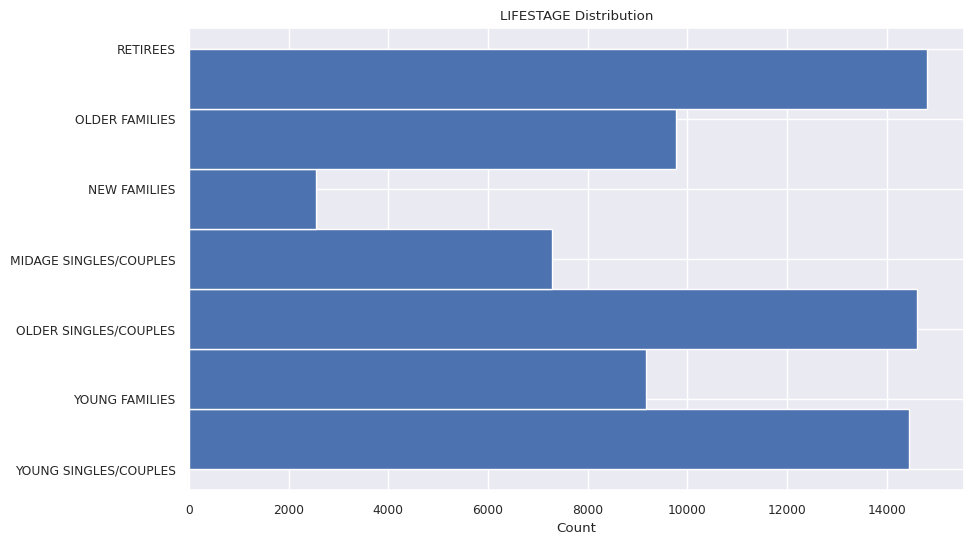

In [ ]:
plt.figure(figsize=(10,6))
sns.set(style='darkgrid')
sns.set(font_scale=0.8)
plt.hist(data['LIFESTAGE'],bins=7, orientation='horizontal')
plt.title('LIFESTAGE Distribution')
plt.xlabel('Count')
plt.show()

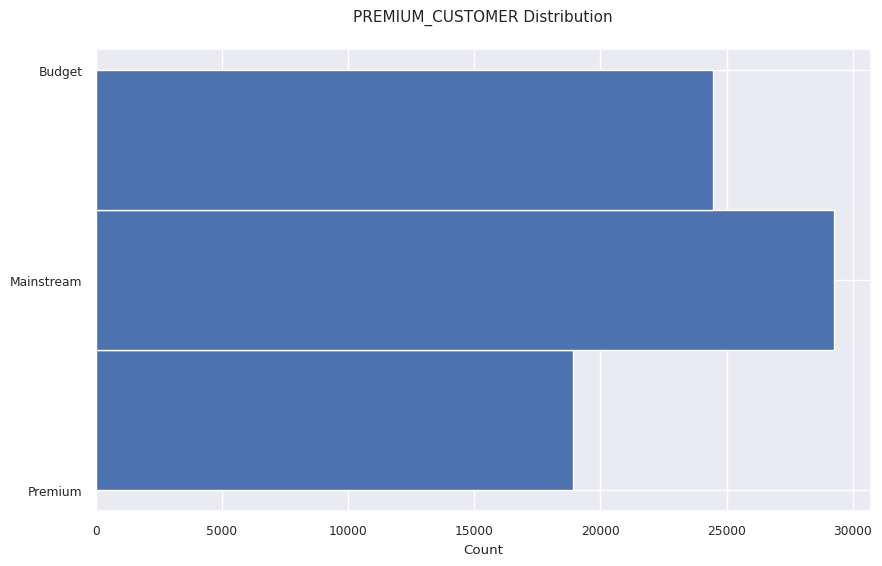

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(data['PREMIUM_CUSTOMER'],bins=3,orientation='horizontal')
plt.title('PREMIUM_CUSTOMER Distribution',fontsize=11,pad=20)
plt.xlabel('Count')
plt.show()

**Bivariate analysis**

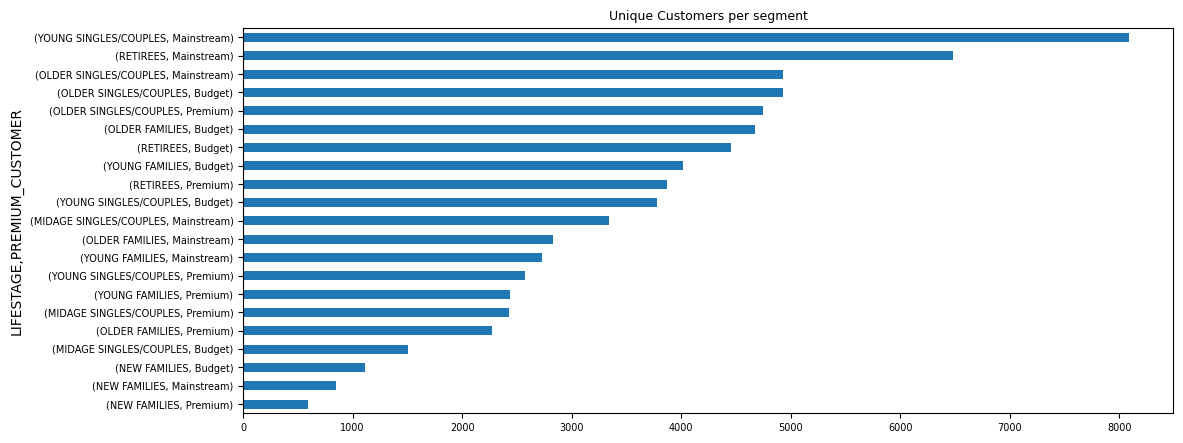

In [4]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().sort_values().plot(kind='barh',figsize=(12,5),fontsize=7)
plt.title('Unique Customers per segment',fontsize=9)
plt.savefig('Unique_customers_per_segment.png',format='png')
plt.show()

In [40]:
perc = ((data.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"')['LYLTY_CARD_NBR'].count()/data['LYLTY_CARD_NBR'].count())*100).round(2)

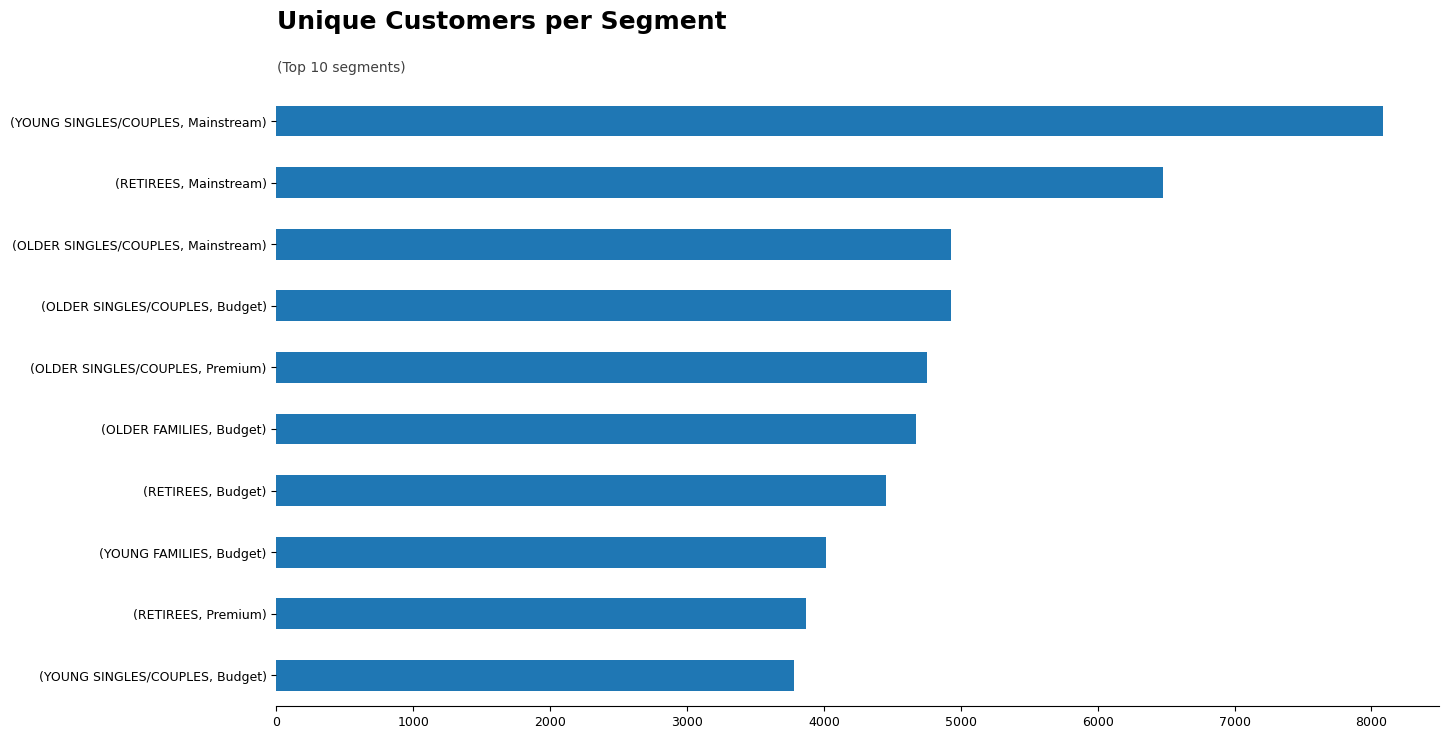

In [19]:
data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).size().sort_values().tail(10).plot(kind='barh',fontsize=9,figsize=(15,8))
sns.despine(left=True,top=True,right=True)
plt.ylabel('')
plt.text(x=2, y=10.5, s='Unique Customers per Segment', fontsize=18, weight='bold')
plt.text(x=2, y=9.8, s='(Top 10 segments)', fontsize=10, alpha=0.75)
plt.show()

In [ ]:
df = data.groupby('LIFESTAGE')[['PREMIUM_CUSTOMER']].value_counts().unstack()
df

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1504,3340,2431
NEW FAMILIES,1112,849,588
OLDER FAMILIES,4675,2831,2274
OLDER SINGLES/COUPLES,4929,4930,4750
RETIREES,4454,6479,3872
YOUNG FAMILIES,4017,2728,2433
YOUNG SINGLES/COUPLES,3779,8088,2574


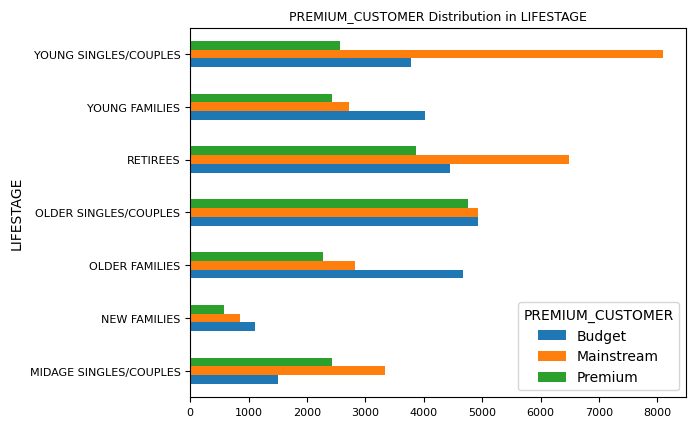

In [ ]:
df.plot(kind='barh',fontsize=8)
plt.title('PREMIUM_CUSTOMER Distribution in LIFESTAGE',fontsize=9)
plt.show()

Findings:

- We have 72,637 unique LYLTY_CARD_NBR's in our dataset
- Majority of LIFESTAGE are the Older and Young singles/couples with New Families making up the least.
- Mainstream and Budget categories make up the most of our data with Premium category having the least
- Majority LIFESTAGE categories are made up of either Budget or Mainstream caregories.

**Transactional Data**

In [3]:
df = pd.read_excel('/content/drive/MyDrive/data/QVI_transaction_data.xlsx')

In [4]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
df.shape

(264836, 8)

**Data quality checks**

**Missingness in our data**

In [ ]:
df.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Observations:

- No missing data
- Wrong data type for the DATE column

In [ ]:
cols = ['DATE','STORE_NBR','LYLTY_CARD_NBR','TXN_ID','PROD_NBR','PROD_NAME']

for col in cols:
  print(f"{col} unique entries : {df[col].nunique()}")


DATE unique entries : 364
STORE_NBR unique entries : 271
LYLTY_CARD_NBR unique entries : 71287
TXN_ID unique entries : 245255
PROD_NBR unique entries : 105
PROD_NAME unique entries : 105


Findings:

- We have multiple transactions per date
- 272 stores w.r.t store number
- We have lylty card numbers appearing more than once in the dataset
- It appears we have entries sharing a transaction id
- We have 114 types of chips available for sale

**Converting Date to datetime format**

In [5]:
df['DATE'] = pd.TimedeltaIndex(df['DATE'],unit='d') + dt.datetime(1899,12,30)

In [ ]:
df.dtypes

DATE              datetime64[ns]
STORE_NBR                  int64
LYLTY_CARD_NBR             int64
TXN_ID                     int64
PROD_NBR                   int64
PROD_NAME                 object
PROD_QTY                   int64
TOT_SALES                float64
dtype: object

**Checking for duplicate entries**

In [ ]:
duplicated_rows = df[df.duplicated(keep=False)]
duplicated_rows

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [ ]:
# Given the TXN_ID appears more than once in the dataset,
# I'll assume this is the same customer purchasing identical items from the same store at different times


**Consistency**

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
print(f"Dataset contains {df['PROD_NAME'].nunique()} unique product names")

Dataset contains 114 unique product names


In [8]:
df['product_names'] = df['PROD_NAME'].str.replace('[0-9]+[gG]','').str.replace('&','')
prod_name_df = df.product_names.str.split(expand=True).stack().value_counts().reset_index()
prod_name_df.columns = ['Word', 'Frequency']

In [9]:
prod_name_df.head()

,Word,Frequency
0,Chips,49770
1,Kettle,41288
2,Smiths,28860
3,Salt,27976
4,Cheese,27890


In [10]:
df = df.drop('product_names',axis=1)

In [11]:
# Removing all entries containing Salsa as it is a dip and not chips

filt_df = df[df['PROD_NAME'].str.contains('Salsa')]

In [12]:
len(filt_df)

18094

In [13]:
df = df[df['PROD_NAME'].str.contains('Salsa') == False]

In [14]:
df.shape

(246742, 8)

In [ ]:
# Summary stats of the transaction data

df.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


**Outlier detection**

In [15]:
df[['PROD_QTY']].value_counts()

PROD_QTY
2           220070
1            25476
5              415
3              408
4              371
200              2
dtype: int64

In [16]:
# it appears a particular individual bought 200 packs twice
# we'll drop this columns for now

df[df['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [17]:
df = df[df['PROD_QTY'] != 200]
df.shape

(246740, 8)

In [ ]:
# TOT_SALES summary per transaction

df['TOT_SALES'].describe()

count    246740.000000
mean          7.316113
std           2.474897
min           1.700000
25%           5.800000
50%           7.400000
75%           8.800000
max          29.500000
Name: TOT_SALES, dtype: float64

In [ ]:
# Looking into time

In [18]:
tx_date_df = df.groupby('DATE')[['TOT_SALES']].count().reset_index()
tx_date_df.rename(columns={'TOT_SALES':'No.of_transactions'},inplace=True)
tx_date_df

,DATE,No.of_transactions
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


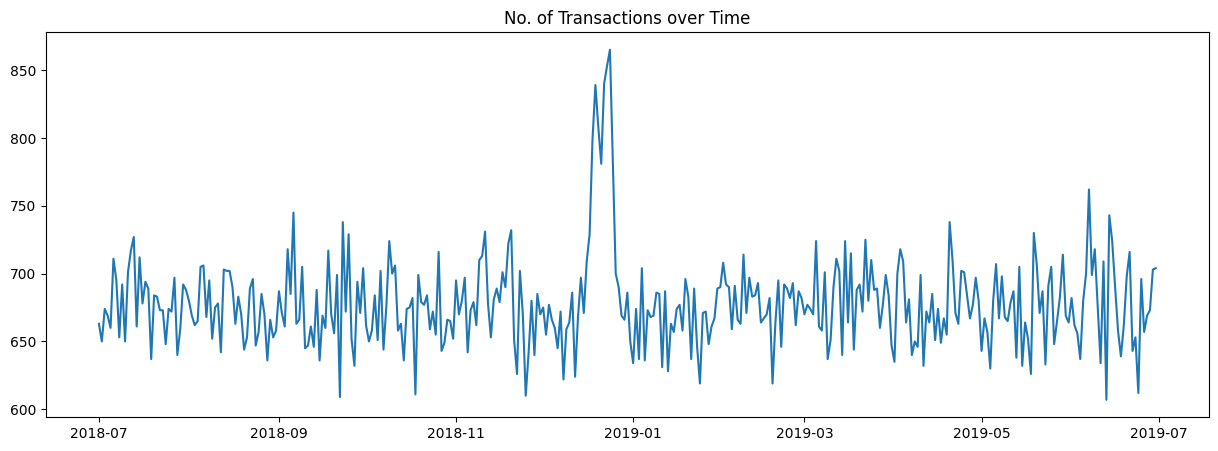

In [ ]:
plt.figure(figsize=(15,5))
date = tx_date_df['DATE']
values = tx_date_df['No.of_transactions']
plt.plot(date,values)
plt.title('No. of Transactions over Time')
plt.show()

In [ ]:
# It appears we had a peak at around December

# Zooming into december

start_date = '2018-11-30'
end_date = '2019-01-01'

dec_df = tx_date_df[tx_date_df['DATE'] >= start_date]
dec_df = dec_df[dec_df['DATE'] <= end_date]


In [ ]:
daily_locator = mdates.MonthLocator(interval=1)

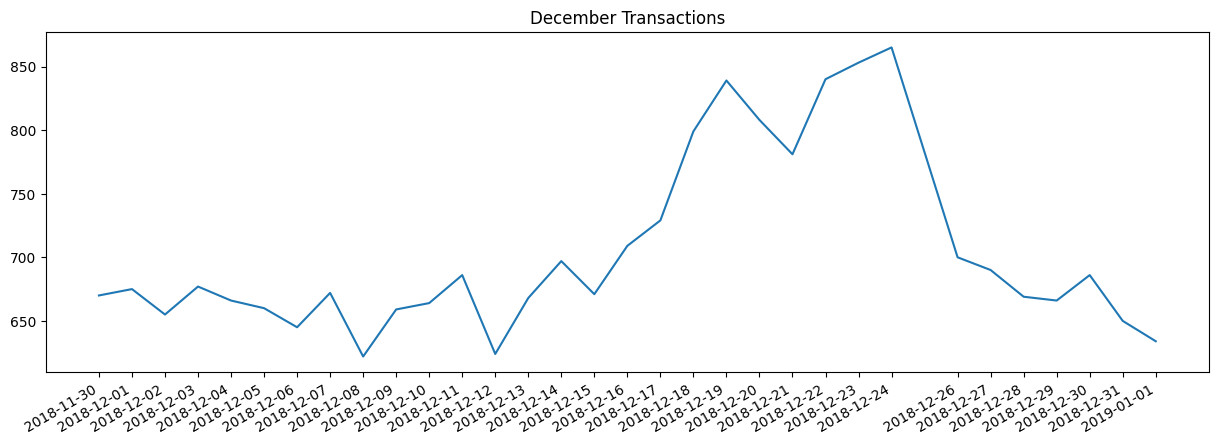

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
date = dec_df['DATE']
values = dec_df['No.of_transactions']
plt.plot(date,values)
plt.title('December Transactions')
fig.autofmt_xdate()
plt.xticks(dec_df['DATE'])
plt.show()


In [ ]:
date_range = pd.date_range(start='2018-07-01',end='2019-6-30',freq='D')

In [ ]:
date_range

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [ ]:
tx_dates = df['DATE'].to_list()

In [ ]:
# it appears we don't have an entry for the 25th of dec

for date in date_range:
  if date not in tx_dates:
    print(f"Missing Dates in our dataset : {date}")

Missing Dates in our dataset : 2018-12-25 00:00:00


**Brand Analysis**

In [19]:
# Grabbing the Brand names

df['BRAND'] = df['PROD_NAME'].str.split(expand=True)[0]

In [20]:
print(f" Unique Brands : {df['BRAND'].nunique()}")

 Unique Brands : 28


In [ ]:
# Checking for consistency in the Brand Names

In [21]:
df['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

It appears we have similar brand names denoted as different brands:

- Doritos : Dorito
- Infzns : Infuzions
- Smith : Smiths
- RRD : Red
- Snbts : Sunbites
- WW : Woolworths
- Natural : NCC
- Grain : GrnWves

In [22]:
def clean_brand_names(line):

    brand = line["BRAND"]
    if brand == "Dorito":
        return "Doritos"
    elif brand == "Grain":
        return "GrnWves"
    elif brand == "Infzns":
        return "Infuzions"
    elif brand == "NCC":
        return "Natural"
    elif brand == "Red":
        return "RRD"
    elif brand == "Smith":
        return "Smiths"
    elif brand == "Snbts":
        return "Sunbites"
    elif brand == "WW":
        return "Woolworths"
    else:
        return brand

In [23]:
df['BRAND'] = df.apply(lambda line: clean_brand_names(line), axis=1)


In [24]:
print(df['BRAND'].unique())
print(f"Unique product names : {df['BRAND'].nunique()}")

['Natural' 'CCs' 'Smiths' 'Kettle' 'GrnWves' 'Doritos' 'Twisties'
 'Woolworths' 'Thins' 'Burger' 'Cheezels' 'Infuzions' 'RRD' 'Pringles'
 'Tyrrells' 'Cobs' 'French' 'Tostitos' 'Cheetos' 'Sunbites']
Unique product names : 20


In [25]:
# Quantities per brand

brand_qty_df = df.groupby('BRAND')[['PROD_QTY']].sum().sort_values(by='PROD_QTY',ascending=False).reset_index()

In [26]:
brand_qty_df.head()

,BRAND,PROD_QTY
0,Kettle,79051
1,Smiths,57582
2,Doritos,48331
3,Pringles,48019
4,RRD,30891


In [27]:
# Total sales per brand

brand_sales_df = df.groupby('BRAND')[['TOT_SALES']].sum().sort_values(by='TOT_SALES',ascending=False).reset_index()


In [28]:
brand_sales_df.head()

,BRAND,TOT_SALES
0,Kettle,390239.8
1,Doritos,226329.9
2,Smiths,217492.0
3,Pringles,177655.5
4,Infuzions,99047.6


In [29]:
# Grabbing the packet sizes

df['PACKET_SIZE'] = df['PROD_NAME'].str.replace('[A-Z,a-z,/,&]','',regex=True).str.strip()

In [30]:
print(f" Unique packet sizes: {df['PACKET_SIZE'].nunique()}")

 Unique packet sizes: 20


**Packet_size analysis**

In [46]:
# Chip packet sizes in the dataset

df['PACKET_SIZE'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

In [52]:
size_df = df[df['PACKET_SIZE'] == '380']

In [54]:
size_df['BRAND'].unique()

array(['Doritos', 'Smiths'], dtype=object)

In [55]:
size_df = df[df['PACKET_SIZE'] == '70']
size_df['BRAND'].unique()

array(['Infuzions'], dtype=object)

In [31]:
# Quantities sold per packet_size

pckt_size_qty_df = df.groupby('PACKET_SIZE')[['PROD_QTY']].sum().sort_values(by='PROD_QTY',ascending=False).reset_index()

In [48]:
pckt_size_qty_df.tail()

,PACKET_SIZE,PROD_QTY
15,160,5604
16,220,2970
17,70,2855
18,180,2764
19,125,2730


In [33]:
# Tot_sales per packet_size

pckt_size_sales_df = df.groupby('PACKET_SIZE')[['TOT_SALES']].sum().sort_values(by='TOT_SALES',ascending=False).reset_index()

In [47]:
pckt_size_sales_df.tail()

,PACKET_SIZE,TOT_SALES
15,90,9676.4
16,180,8568.4
17,70,6852.0
18,220,6831.0
19,125,5733.0




*   The largest packet size available is 380g with the smallest being 70g.
*   Most sold packet size in terms of quantity and sales is 175g with the 125g size ranking the least.
*   Brands selling the largest packet size are Doritos and Smiths.
*   Infuzions is the brand with the least packet size (70g)





**Joining the dataframes**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Saving the merged dataset for analysis

df.set_index('LYLTY_CARD_NBR').join(data.set_index('LYLTY_CARD_NBR')).reset_index().to_csv('quantium_merged_data.csv')

In [2]:
complete_df = pd.read_csv('/content/drive/MyDrive/quantium_merged_data.csv')

In [3]:
complete_df.drop('Unnamed: 0',inplace=True,axis=1)

In [4]:
complete_df.shape

(246740, 13)

In [ ]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246740 entries, 0 to 246739
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    246740 non-null  int64  
 1   DATE              246740 non-null  object 
 2   STORE_NBR         246740 non-null  int64  
 3   TXN_ID            246740 non-null  int64  
 4   PROD_NBR          246740 non-null  int64  
 5   PROD_NAME         246740 non-null  object 
 6   PROD_QTY          246740 non-null  int64  
 7   TOT_SALES         246740 non-null  float64
 8   BRAND             246740 non-null  object 
 9   PACKET_SIZE       246740 non-null  int64  
 10  LIFESTAGE         246740 non-null  object 
 11  PREMIUM_CUSTOMER  246740 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 22.6+ MB


**EDA on complete dataframe**

**Let's look into which categories spent the most on chips:**
**Total sales**

In [ ]:
# By LIFESTAGE

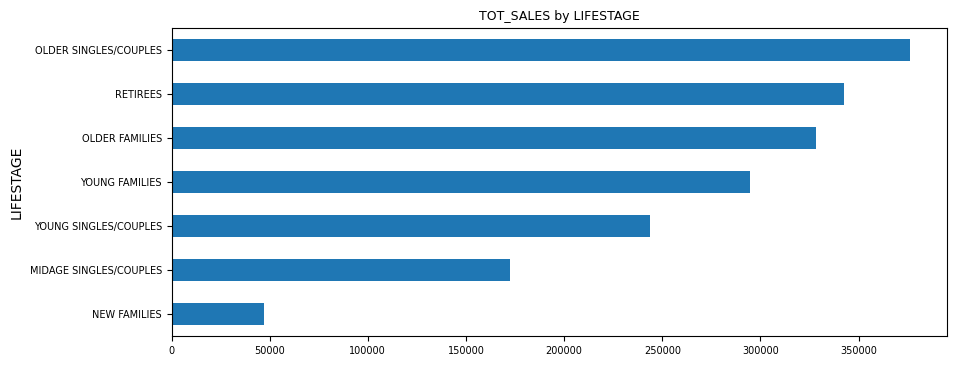

In [ ]:
complete_df.groupby('LIFESTAGE')[['TOT_SALES']].sum().sort_values(by='TOT_SALES',ascending=True).plot(kind='barh',
                                                                                                      figsize=(10,4),
                                                                                                      fontsize=7,legend=False
                                                                                                      )
plt.title('TOT_SALES by LIFESTAGE',fontsize=9)
plt.show()

In [ ]:
# By PREMIUM_CUSTOMER

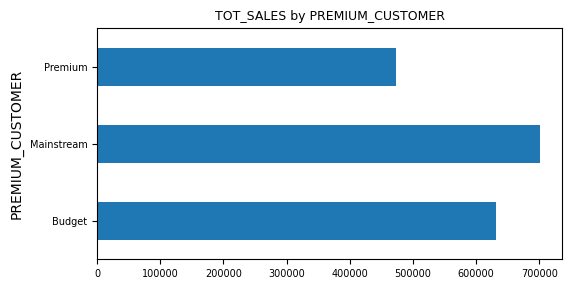

In [ ]:
complete_df.groupby('PREMIUM_CUSTOMER')[['TOT_SALES']].sum().plot(kind='barh',
                                                                  figsize=(6,3),
                                                                  fontsize=7,legend=False)
plt.title('TOT_SALES by PREMIUM_CUSTOMER',fontsize=9)
plt.show()

In [ ]:
# By BOTH LIFESTAGE & PREMIUM_CUSTOMER

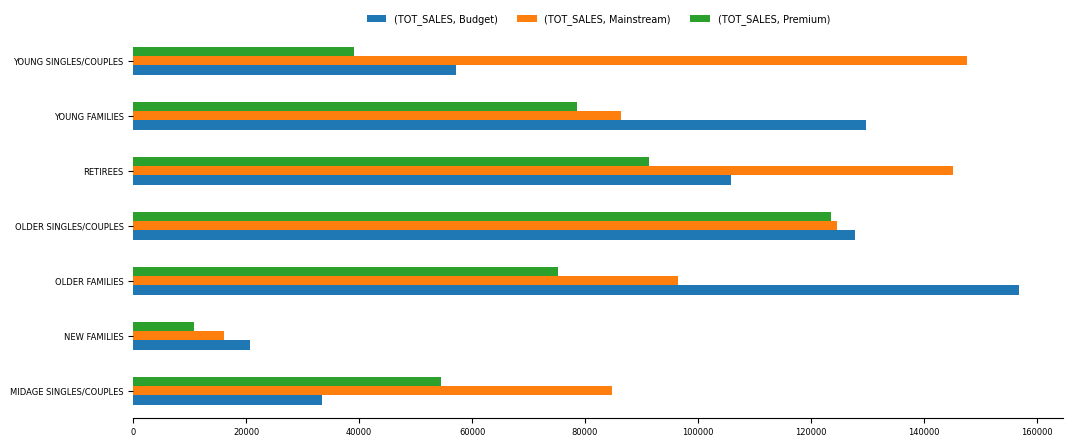

In [8]:
fig,ax = plt.subplots(figsize=(12,5))
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].agg('sum').unstack().plot(kind='barh',
                                                                                          ax=ax,
                                                                                          fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
# plt.savefig('sales2.png')
plt.show()

**Total series over time analysis**

In [27]:
budget_sales = complete_df.groupby(['DATE','LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().unstack().unstack().loc[:,'TOT_SALES']['Budget']
mainstream_sales = complete_df.groupby(['DATE','LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().unstack().unstack().loc[:,'TOT_SALES']['Mainstream']
premium_sales = complete_df.groupby(['DATE','LIFESTAGE','PREMIUM_CUSTOMER'])[['TOT_SALES']].sum().unstack().unstack().loc[:,'TOT_SALES']['Premium']

*Findings*

Majority of sales are coming from the following segments:

- Older families / Budget
- Young singles/couples / Mainstream
- Retirees / Mainstream
- Young families / Budget

Least sales:

- New families as a whole

To Note:

-Older singles/couples appear to spend about the same regardless of customer segmentation

**Average sales per customer segment**

In [ ]:
# Mean sales analysis
complete_df.groupby('PREMIUM_CUSTOMER')[['TOT_SALES']].aggregate('mean').reset_index()


,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,7.277458
1,Mainstream,7.374193
2,Premium,7.282751


In [ ]:
complete_df.groupby('LIFESTAGE')[['TOT_SALES']].aggregate('mean').reset_index()


,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,7.373442
1,NEW FAMILIES,7.287664
2,OLDER FAMILIES,7.274899
3,OLDER SINGLES/COUPLES,7.402982
4,RETIREES,7.373994
5,YOUNG FAMILIES,7.275841
6,YOUNG SINGLES/COUPLES,7.175854


In [ ]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].aggregate('mean').unstack()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,7.108442,7.637156,7.152371
NEW FAMILIES,7.297256,7.313364,7.231720
OLDER FAMILIES,7.291241,7.281440,7.232779
OLDER SINGLES/COUPLES,7.444305,7.306049,7.459997
RETIREES,7.445786,7.269352,7.461315
YOUNG FAMILIES,7.302705,7.226772,7.285951
YOUNG SINGLES/COUPLES,6.663023,7.551279,6.673325


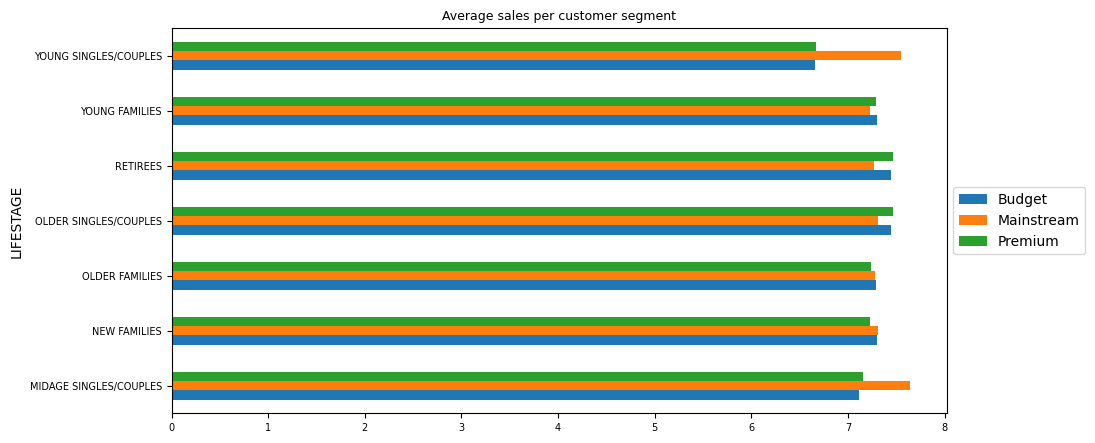

In [ ]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].aggregate('mean').unstack().plot(kind='barh',
                                                                                                    figsize=(10,5),fontsize=7
                                                                                                   )
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.title('Average sales per customer segment',fontsize=9)
plt.show()

Findings:

- Not much difference between majority of the segments.
- Highest average spenders appear to be Midage singles/couples / Mainstream and the Young singles/couples / Mainstream.

**Customer composition analysis per segment**

In [ ]:
complete_df[['PREMIUM_CUSTOMER']].value_counts()

PREMIUM_CUSTOMER
Mainstream          95043
Budget              86762
Premium             64935
dtype: int64

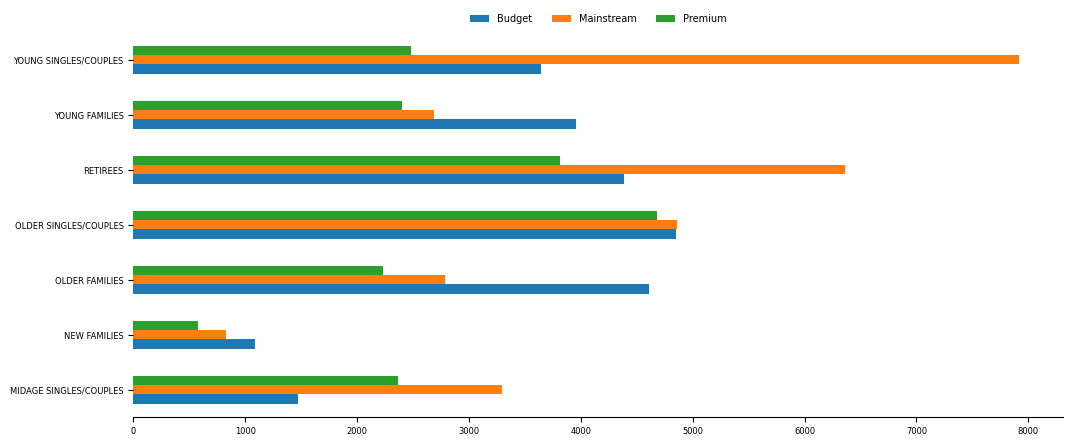

In [7]:
fig,ax = plt.subplots(figsize=(12,5))
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack().plot(kind='barh',
                                                                                          ax=ax,
                                                                                          fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
plt.savefig('cust.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


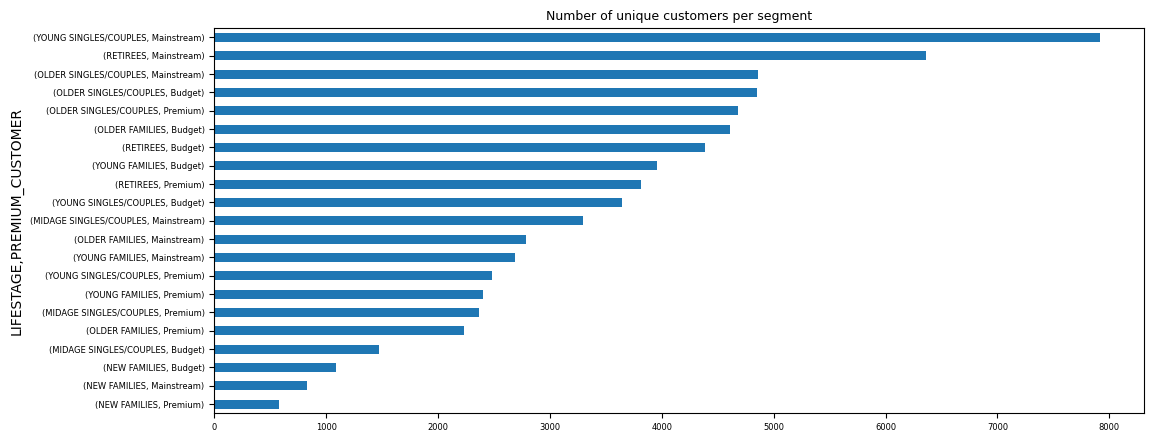

In [ ]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().sort_values(ascending=True).plot(kind='barh',
                                                                                                                   fontsize=6,figsize=(12,5)
                                                                                                                   )
plt.title('Number of unique customers per segment',fontsize=9)
plt.savefig('Unique_Customers_per_Segment.png')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


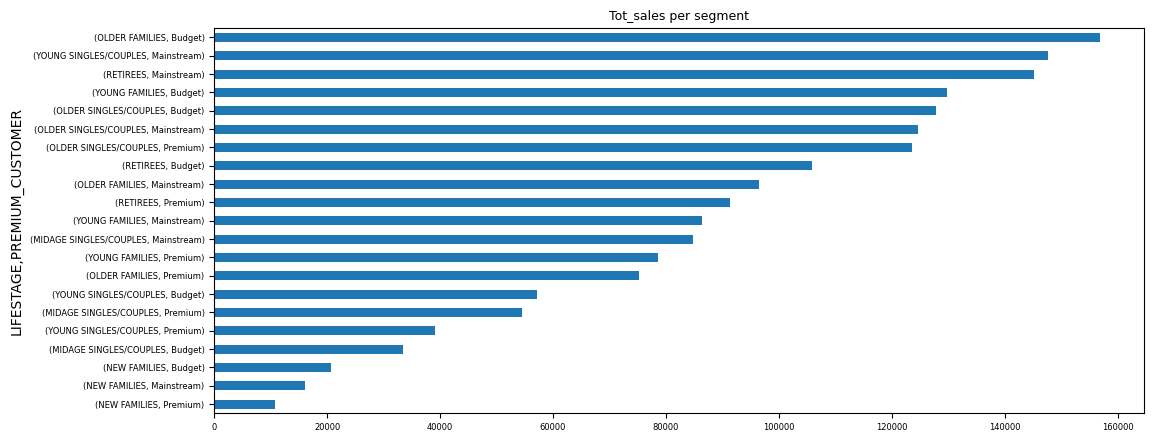

In [ ]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=True).plot(kind='barh',
                                                                                                          figsize=(12,5),
                                                                                                          fontsize=6)
plt.title('Tot_sales per segment',fontsize=9)
plt.savefig('Tot_Sales per Segment.png')
plt.show()

Findings:

Majority of sales are coming from:
- Older families / Budget
- Retirees / Mainstream
- Young Singles/Couples / Mainstream

The drivers of these sales seem to be the number of unique customers in Young Singles/Couples Mainstream and Retirees Mainstream.

-To Note:
Sales in the Older families / Budget do not necessarily come from the number of customers rather from repeat customers showing customer loyalty from this segment. We'll dive into this further.

**Customer purchase frequency analysis per segment**

In [44]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].agg('size')

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget               4691
                        Mainstream          11095
                        Premium              7612
NEW FAMILIES            Budget               2824
                        Mainstream           2185
                        Premium              1488
OLDER FAMILIES          Budget              21514
                        Mainstream          13241
                        Premium             10403
OLDER SINGLES/COUPLES   Budget              17172
                        Mainstream          17061
                        Premium             16560
RETIREES                Budget              14225
                        Mainstream          19970
                        Premium             12236
YOUNG FAMILIES          Budget              17763
                        Mainstream          11947
                        Premium             10784
YOUNG SINGLES/COUPLES   Budget               8573
         

In [ ]:
cust = complete_df.groupby(['LYLTY_CARD_NBR','LIFESTAGE','PREMIUM_CUSTOMER']).count()['DATE']
cust

In [47]:
cust.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg(['mean','count','sum']).sort_values(by='sum',ascending=False)

mean  count    sum
LIFESTAGE              PREMIUM_CUSTOMER                        
OLDER FAMILIES         Budget            4.665799   4611  21514
RETIREES               Mainstream        3.140925   6358  19970
YOUNG SINGLES/COUPLES  Mainstream        2.468612   7917  19544
YOUNG FAMILIES         Budget            4.493549   3953  17763
OLDER SINGLES/COUPLES  Budget            3.541349   4849  17172
                       Mainstream        3.511939   4858  17061
                       Premium           3.536950   4682  16560
RETIREES               Budget            3.244014   4385  14225
OLDER FAMILIES         Mainstream        4.749283   2788  13241
RETIREES               Premium           3.209864   3812  12236
YOUNG FAMILIES         Mainstream        4.449534   2685  11947
MIDAGE SINGLES/COUPLES Mainstream        3.364160   3298  11095
YOUNG FAMILIES         Premium           4.497081   2398  10784
OLDER FAMILIES         Premium           4.662931   2231  10403
YOUNG SINGLES/COUPLES  Budget            2.350699   3647   8573
MIDAGE SINGLES/COUPLES Premium           3.213170   2369   7612
YOUNG SINGLES/COUPLES  Premium           2.359677   2480   5852
MIDAGE SINGLES/COUPLES Budget            3.182497   1474   4691
NEW FAMILIES           Budget            2.597976   1087   2824
                       Mainstream        2.632530    830   2185
                       Premium           2.587826    575   1488

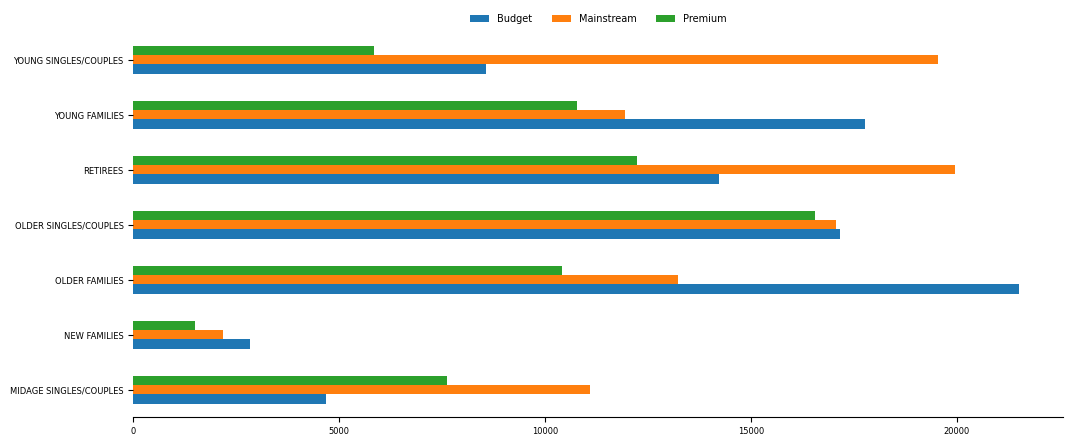

In [14]:
fig,ax = plt.subplots(figsize=(12,5))
cust.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg('sum').sort_values().unstack().plot(kind='barh',ax=ax,fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
plt.savefig('no.of_transactions.png')
plt.show()

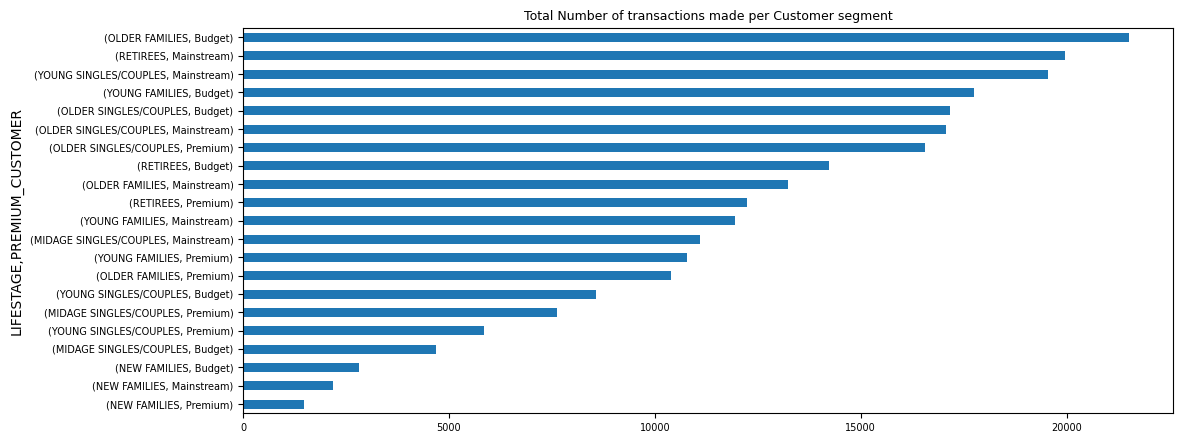

In [49]:
cust.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg('sum').sort_values().plot(kind='barh',
                                                                             fontsize=7,
                                                                             figsize=(12,5))
plt.title('Total Number of transactions made per Customer segment',fontsize=9)
plt.savefig('Purchase frequency per segment.png')
plt.show()

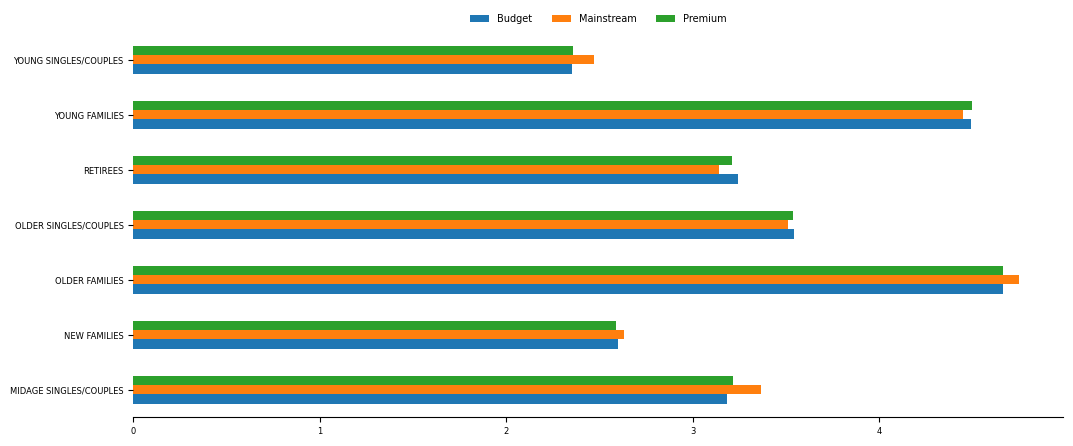

In [17]:
fig,ax = plt.subplots(figsize=(12,5))
cust.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg('mean').sort_values().unstack().plot(kind='barh',ax=ax,fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
plt.savefig('mean_no.of_transactions.png')
plt.show()

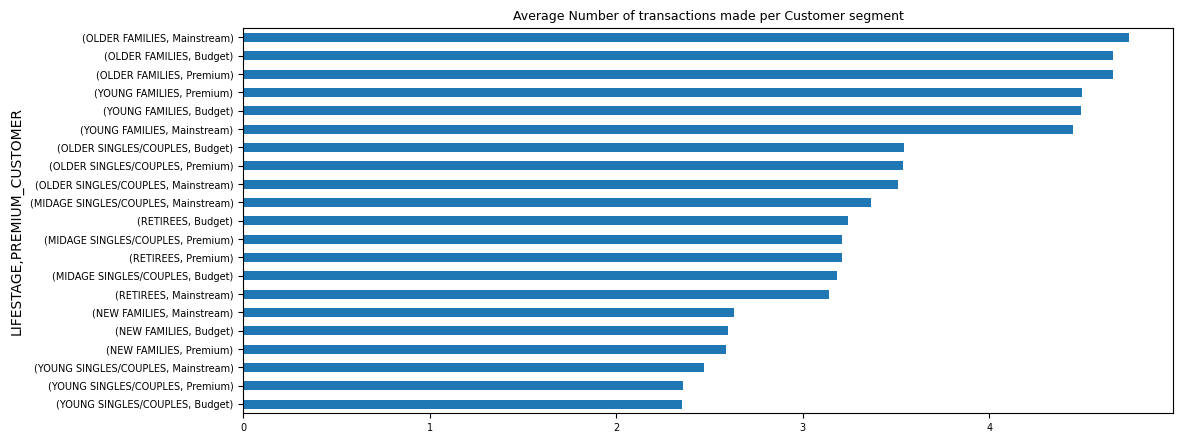

In [48]:
cust.groupby(['LIFESTAGE','PREMIUM_CUSTOMER']).agg('mean').sort_values().plot(kind='barh',
                                                                             fontsize=7,
                                                                             figsize=(12,5))
plt.title('Average Number of transactions made per Customer segment',fontsize=9)
plt.show()

We can observe that the contributing factors to Older families / Budget segment are:
- Relatively high unique customer number
- Highest number of repeat transactions by their customers

**Quantity of chips bought by each segment**

In [ ]:
complete_df.groupby('PREMIUM_CUSTOMER')[['PROD_QTY']].sum().reset_index()

,PREMIUM_CUSTOMER,PROD_QTY
0,Budget,165774
1,Mainstream,180780
2,Premium,123845


In [ ]:
complete_df.groupby('LIFESTAGE')[['PROD_QTY']].sum().reset_index()

,LIFESTAGE,PROD_QTY
0,MIDAGE SINGLES/COUPLES,44496
1,NEW FAMILIES,12070
2,OLDER FAMILIES,87896
3,OLDER SINGLES/COUPLES,97185
4,RETIREES,87875
5,YOUNG FAMILIES,78577
6,YOUNG SINGLES/COUPLES,62300


In [ ]:
# Total chips bought per customer per segment

complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].sum().unstack()

PROD_QTY                   
PREMIUM_CUSTOMER         Budget Mainstream Premium
LIFESTAGE                                         
MIDAGE SINGLES/COUPLES     8883      21213   14400
NEW FAMILIES               5241       4060    2769
OLDER FAMILIES            41853      25804   20239
OLDER SINGLES/COUPLES     32883      32607   31695
RETIREES                  26932      37677   23266
YOUNG FAMILIES            34482      23194   20901
YOUNG SINGLES/COUPLES     15500      36225   10575

In [ ]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].sum().sort_values(by='PROD_QTY',ascending=False)

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Budget               41853
RETIREES               Mainstream           37677
YOUNG SINGLES/COUPLES  Mainstream           36225
YOUNG FAMILIES         Budget               34482
OLDER SINGLES/COUPLES  Budget               32883
                       Mainstream           32607
                       Premium              31695
RETIREES               Budget               26932
OLDER FAMILIES         Mainstream           25804
RETIREES               Premium              23266
YOUNG FAMILIES         Mainstream           23194
MIDAGE SINGLES/COUPLES Mainstream           21213
YOUNG FAMILIES         Premium              20901
OLDER FAMILIES         Premium              20239
YOUNG SINGLES/COUPLES  Budget               15500
MIDAGE SINGLES/COUPLES Premium              14400
YOUNG SINGLES/COUPLES  Premium              10575
MIDAGE SINGLES/COUPLES Budget                8883
NEW FAMILIES           Budget                5241
                       Mainstream            4060
                       Premium               2769

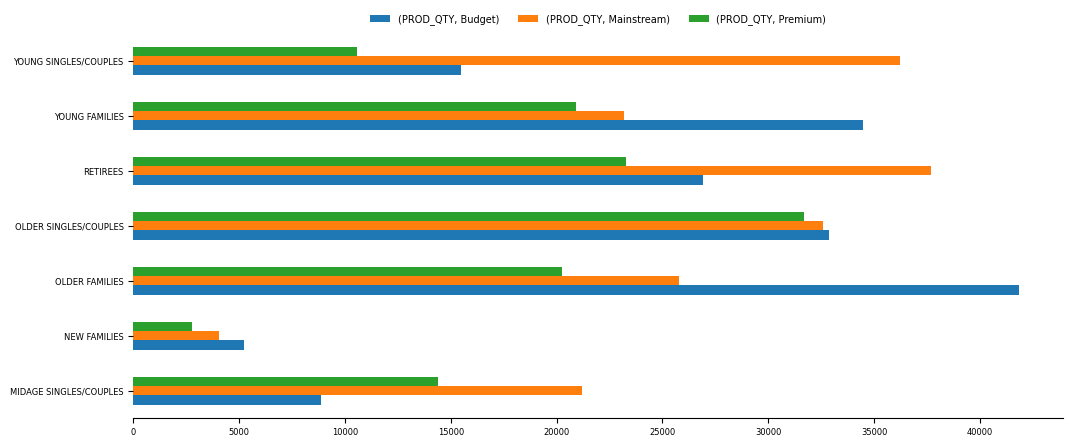

In [19]:
fig,ax = plt.subplots(figsize=(12,5))
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].sum().unstack().plot(kind='barh',ax=ax,fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
plt.savefig('quantity_sold_per_segment.png')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


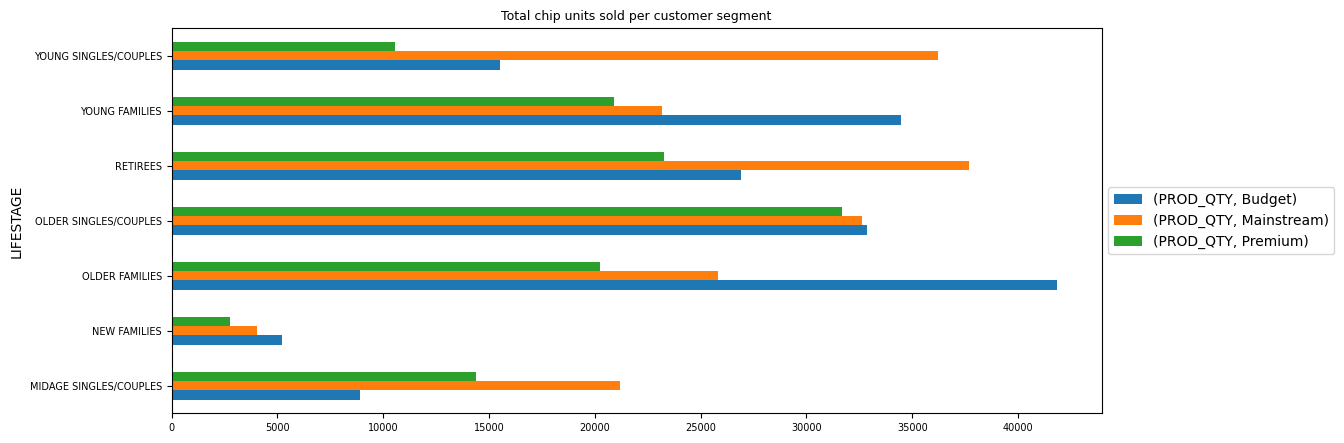

In [ ]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].sum().unstack().plot(kind='barh',
                                                                                         figsize=(12,5),fontsize=7
                                                                                         )
plt.title('Total chip units sold per customer segment',fontsize=9)
plt.legend(bbox_to_anchor=(1.0,0.5),loc='center left')
plt.savefig('Total chip units sold per segment.png')
plt.show()

**Units per customer per segment**

In [21]:
avg_units = complete_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])[['PROD_QTY']].sum()

In [22]:
avg_units['No._of_cust'] = complete_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])['LYLTY_CARD_NBR'].nunique()

In [23]:
avg_units['Avg_Chips_per_cust'] = avg_units['PROD_QTY']/avg_units['No._of_cust']

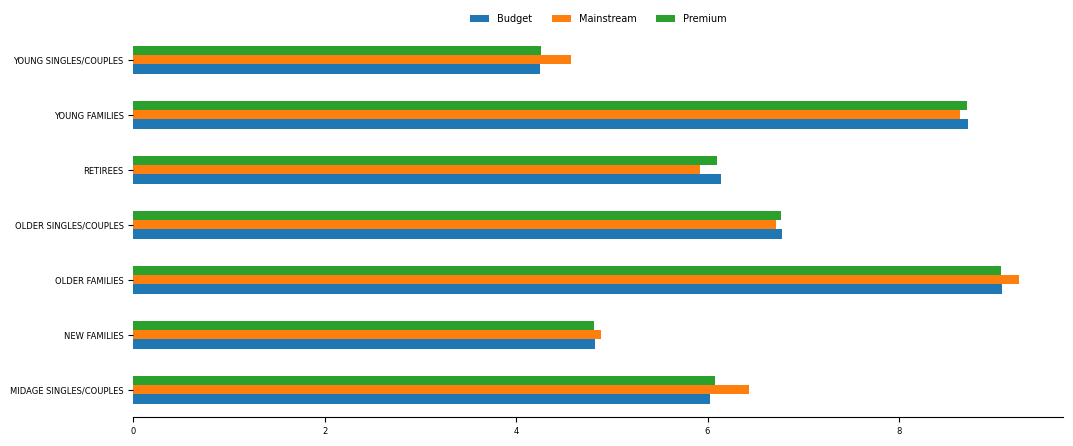

In [27]:
fig,ax = plt.subplots(figsize=(12,5))
avg_units['Avg_Chips_per_cust'].unstack().plot(kind='barh',ax=ax,fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
plt.savefig('avg_units_sold_per_segment.png')
plt.show()

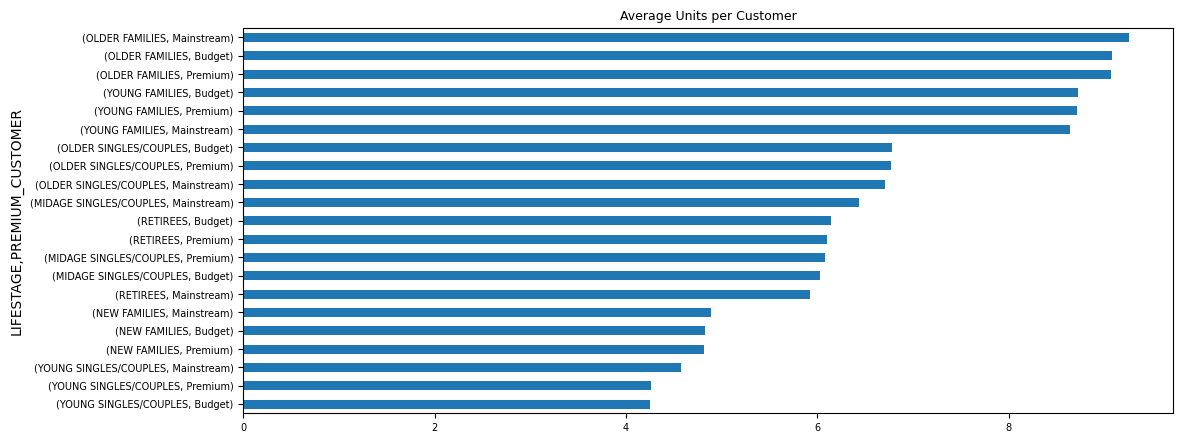

In [99]:
avg_units['Avg_Chips_per_cust'].sort_values().plot(kind='barh',figsize=(12,5),fontsize=7)
plt.title('Average Units per Customer',fontsize=9)
plt.show()

It appears that Older Families and Young Families segments buy more chips per customer.

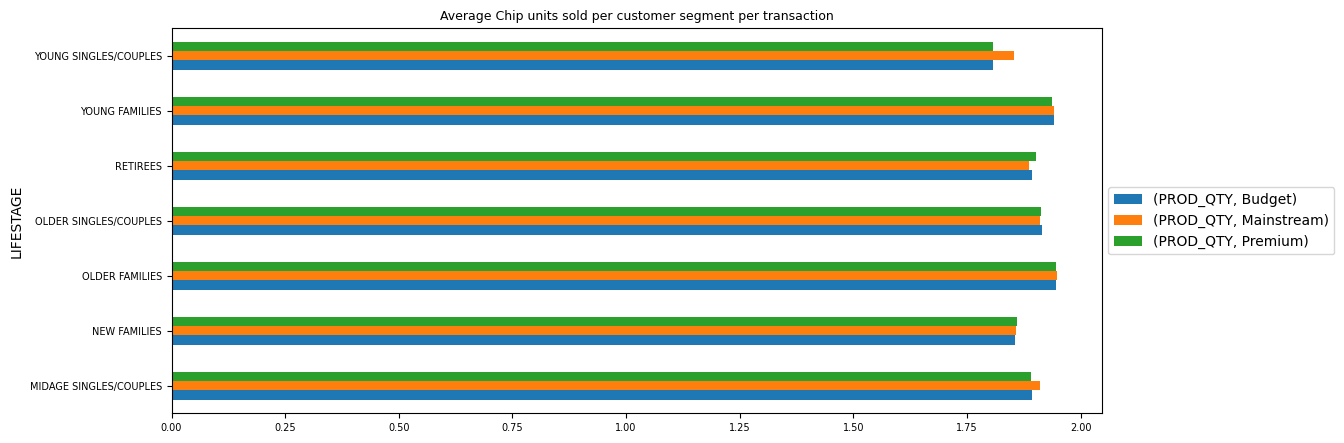

In [100]:
# Average chip units bought per customer by segment per transaction

complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])[['PROD_QTY']].aggregate('mean').unstack().plot(kind='barh',
                                                                                         figsize=(12,5),
                                                                                         fontsize=7,
                                                                                         )
plt.title('Average Chip units sold per customer segment per transaction',fontsize=9)
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

Findings:

Most units sold are to the following segments:

- Older families / Budget
- Retirees / Mainstream
- Young singles/couples / mainstream
- Young families /Budget

On average units sold, there's not much difference among the segments. However, Older families and Young families appear to have the highest averages.

**Average chip price per  customer segment**

In [29]:
complete_df['PRICE_PER_UNIT'] = complete_df['TOT_SALES']/complete_df['PROD_QTY']

In [30]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].agg('mean').sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
YOUNG SINGLES/COUPLES   Mainstream          4.065642
MIDAGE SINGLES/COUPLES  Mainstream          3.994241
RETIREES                Budget              3.924404
                        Premium             3.920942
NEW FAMILIES            Budget              3.917688
                        Mainstream          3.916133
OLDER SINGLES/COUPLES   Premium             3.893182
                        Budget              3.882096
NEW FAMILIES            Premium             3.872110
RETIREES                Mainstream          3.844294
OLDER SINGLES/COUPLES   Mainstream          3.814665
MIDAGE SINGLES/COUPLES  Premium             3.770698
YOUNG FAMILIES          Premium             3.762150
                        Budget              3.760737
OLDER FAMILIES          Budget              3.745340
MIDAGE SINGLES/COUPLES  Budget              3.743328
OLDER FAMILIES          Mainstream          3.737077
YOUNG FAMILIES          Mainstream          3.724533
OLDER

In [103]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().unstack()

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.743328,3.994241,3.770698
NEW FAMILIES,3.917688,3.916133,3.872110
OLDER FAMILIES,3.745340,3.737077,3.717000
OLDER SINGLES/COUPLES,3.882096,3.814665,3.893182
RETIREES,3.924404,3.844294,3.920942
YOUNG FAMILIES,3.760737,3.724533,3.762150
YOUNG SINGLES/COUPLES,3.657366,4.065642,3.665414


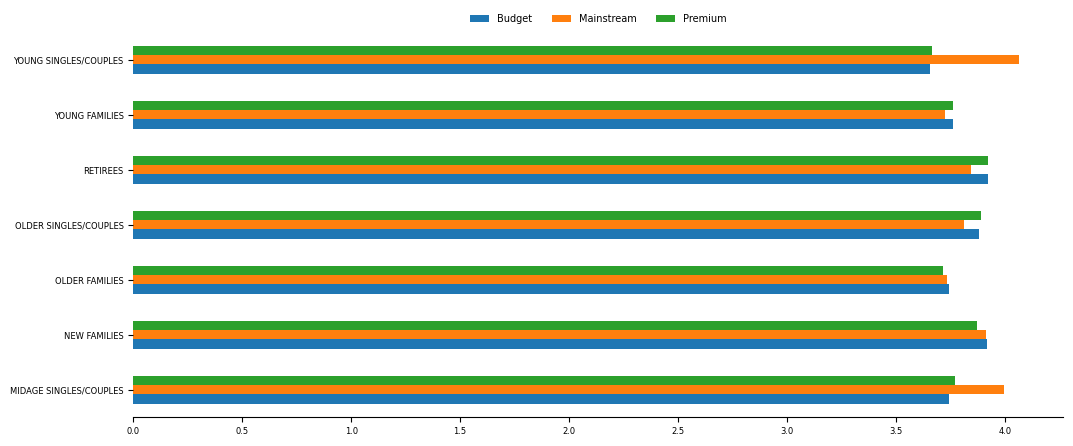

In [32]:
fig,ax = plt.subplots(figsize=(12,5))
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().unstack().plot(kind='barh',ax=ax,fontsize=6)
sns.despine(left=True,top=True,right=True)
sns.move_legend(ax, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,fontsize=7)
plt.ylabel('')
plt.savefig('avg_spend_per_unit_by_segment.png')
plt.show()

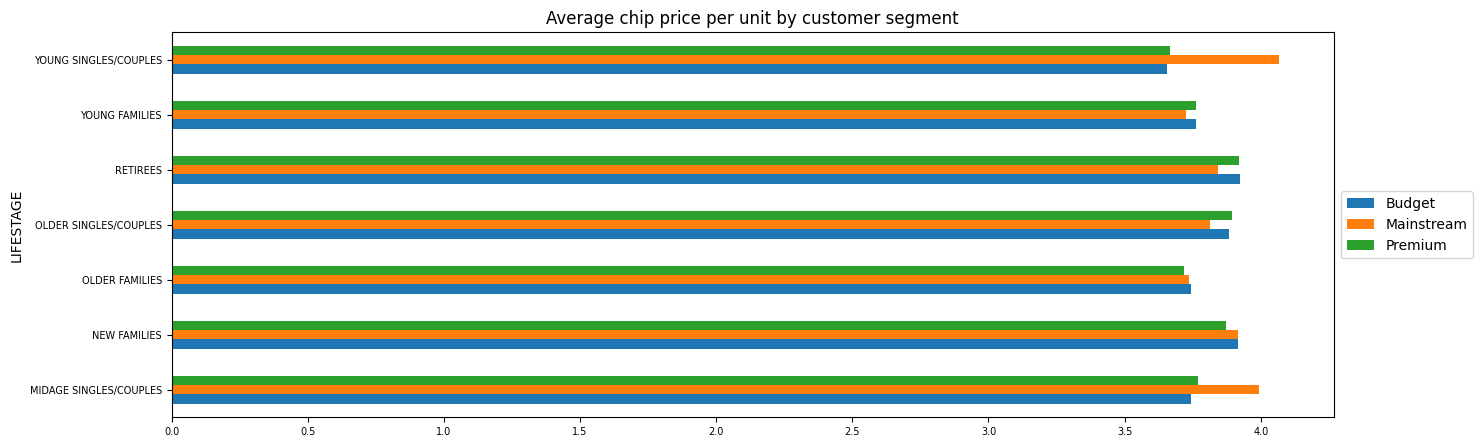

In [104]:
complete_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PRICE_PER_UNIT'].mean().unstack().plot(kind='barh',
                                                                                              figsize=(15,5),
                                                                                              fontsize=7,
                                                                                              legend=False,
                                                                                              title='Average chip price per unit by customer segment')
plt.legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
plt.show()

- Standouts appear to be the Young singles/couples Mainstream and the Midage singles/couples Mainstream.

Since the difference in these statistic isn't large, let's find out whether it is statistically different.

In [ ]:
# Let's Perform an independent t-test between mainstream vs premium and budget midage young singles and couples

In [112]:
import scipy.stats as stats

**Performing t_test to test the statistical significance**

In [123]:
segments = ['YOUNG SINGLES/COUPLES','MIDAGE SINGLES/COUPLES']

In [124]:
seg_df = complete_df[complete_df['LIFESTAGE'].isin(segments)]

In [128]:
mainstream_df = seg_df[seg_df['PREMIUM_CUSTOMER'] == 'Mainstream']


In [131]:
other_df = seg_df[seg_df['PREMIUM_CUSTOMER'] != 'Mainstream']

In [134]:
stats.ttest_ind(other_df['PRICE_PER_UNIT'],mainstream_df['PRICE_PER_UNIT'],alternative='greater')

Ttest_indResult(statistic=-37.83196107667815, pvalue=1.0)

There is strong evidence to reject the null hypothesis.
A p_value of 1 suggests that there is 0% chance that the difference in price per unit is due to chance.

The results of the t_test reveal that there is indeed significant difference between the Mainstream (Young/Singles/Couples, Midage Singles/Couples) and their counterpart Premium and Budget segments.

**PACKET_SIZE analysis**

In [ ]:
# Tot_sales per packet_size

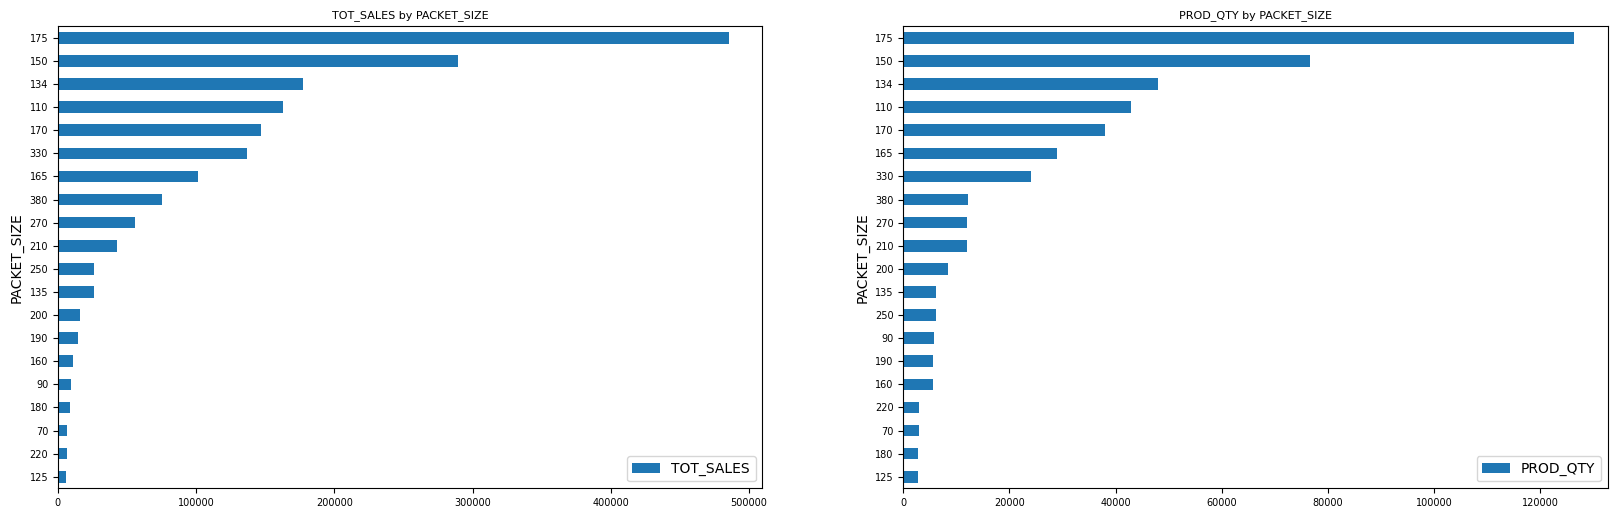

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
complete_df.groupby('PACKET_SIZE')[['TOT_SALES']].sum().sort_values(by='TOT_SALES',ascending=True).plot(kind='barh',
                                                                                                        ax=ax[0],
                                                                                                         fontsize=7)
complete_df.groupby('PACKET_SIZE')[['PROD_QTY']].sum().sort_values(by='PROD_QTY',ascending=True).plot(kind='barh',
                                                                                                      ax=ax[1],
                                                                                                         fontsize=7)
ax[0].set_title('TOT_SALES by PACKET_SIZE',fontsize=8)
ax[1].set_title('PROD_QTY by PACKET_SIZE',fontsize=8)
plt.show()

It appears the packetsizes generating the most sales are the same ones selling the most in terms of quantity.

**Brand analysis**

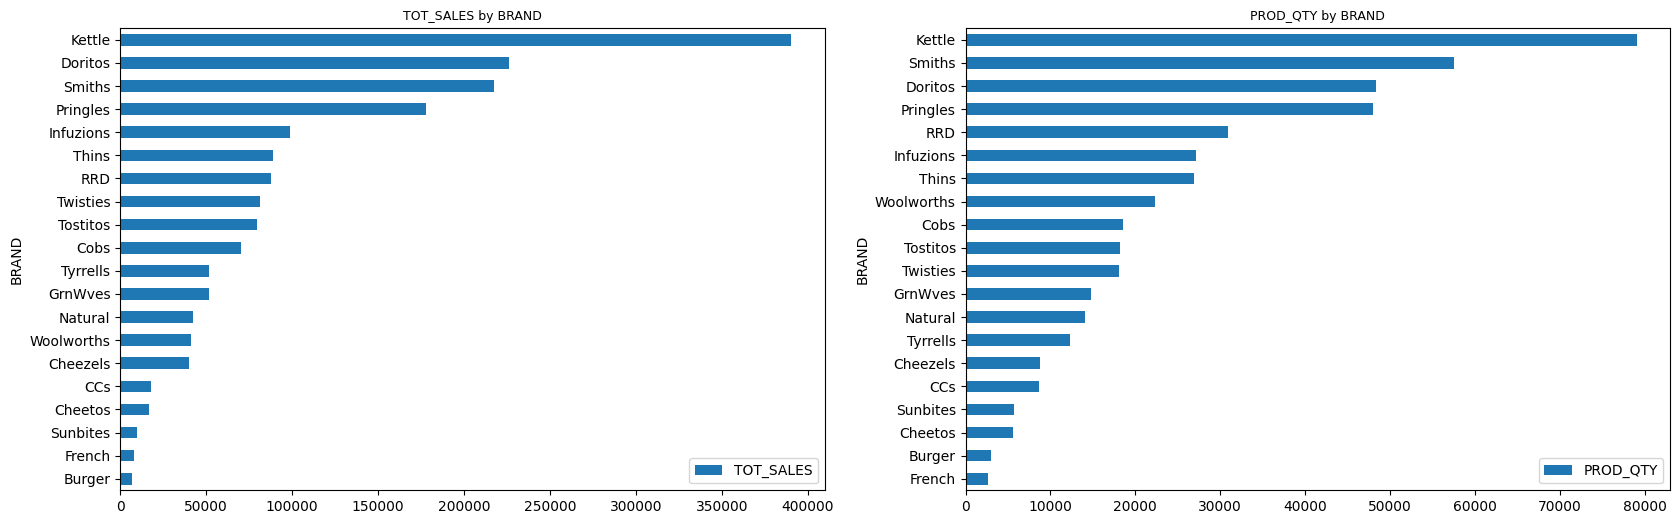

In [ ]:
# Looking into the quantities and sales of each brand in our dataset

fig,ax = plt.subplots(1,2,figsize=(20,6))
complete_df.groupby('BRAND')[['TOT_SALES']].sum().sort_values(by='TOT_SALES',ascending=True).plot(kind='barh',ax=ax[0])
complete_df.groupby('BRAND')[['PROD_QTY']].sum().sort_values(by='PROD_QTY',ascending=True).plot(kind='barh',ax=ax[1])
ax[0].set_title('TOT_SALES by BRAND',fontsize=9)
ax[1].set_title('PROD_QTY by BRAND',fontsize=9)
plt.show()


- Similarly, brands generating the most sales also appear to be the ones being bought the most in terms of quantity.
- To note: Woolworths appears to be the stand out ranking much higher in quantity sold than in Tot_sales made.

In [ ]:
# By product

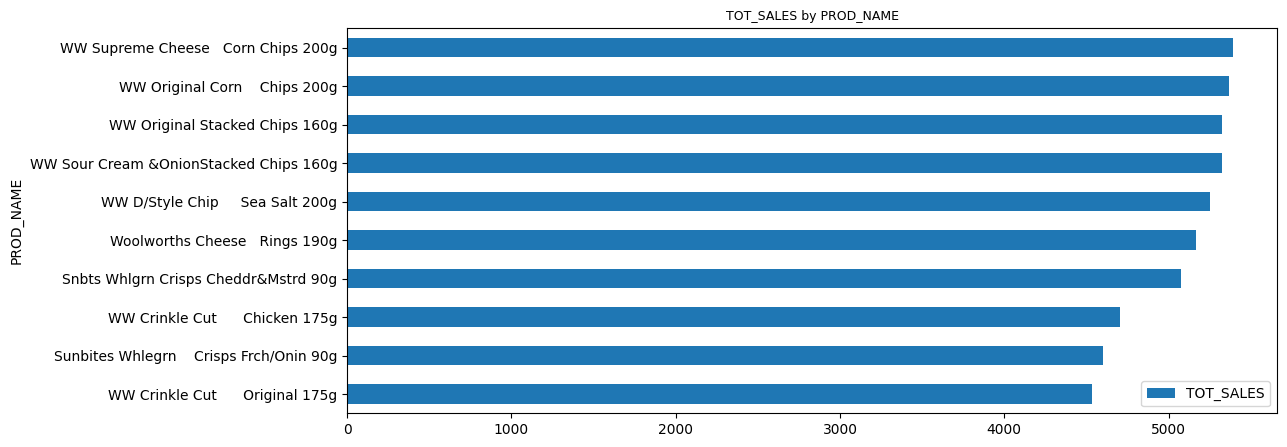

In [ ]:
complete_df.groupby('PROD_NAME')[['TOT_SALES']].sum().sort_values(by='TOT_SALES').head(10).plot(kind='barh',
                                                                                                figsize=(12,5))
plt.title('TOT_SALES by PROD_NAME',fontsize=9)
plt.show()

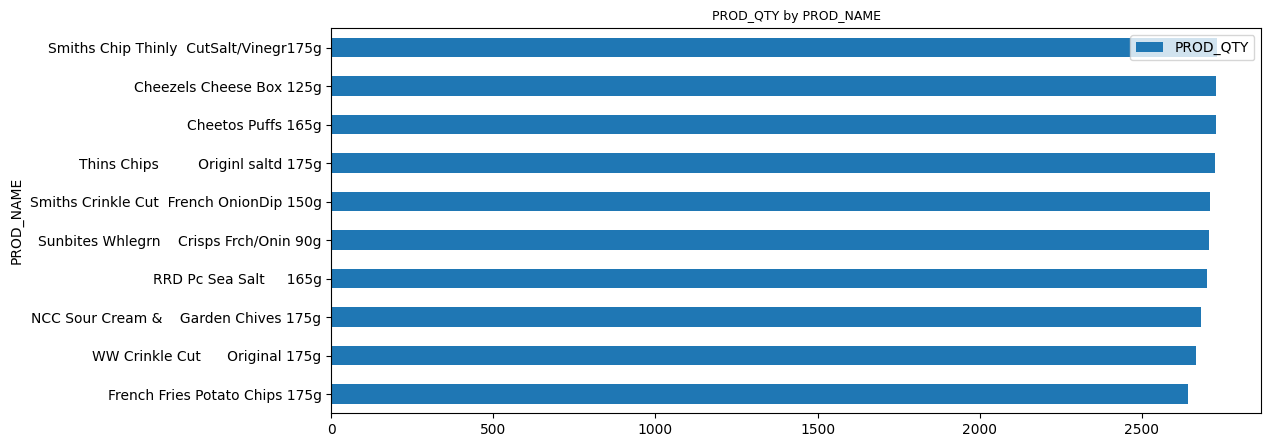

In [ ]:
complete_df.groupby('PROD_NAME')[['PROD_QTY']].sum().sort_values(by='PROD_QTY').head(10).plot(kind='barh',figsize=(12,5))
plt.title('PROD_QTY by PROD_NAME',fontsize=9)
plt.show()

In [ ]:
seg_df = complete_df.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"')

In [ ]:
seg_df['BRAND'].value_counts()

Kettle        3844
Doritos       2379
Pringles      2315
Smiths        1921
Infuzions     1250
Thins         1166
Twisties       900
Tostitos       890
RRD            875
Cobs           864
GrnWves        646
Tyrrells       619
Woolworths     479
Natural        394
Cheezels       346
CCs            222
Cheetos        166
Sunbites       128
French          78
Burger          62
Name: BRAND, dtype: int64

**Focus on a segments contributing the most**

In [ ]:
# FOCUS ON A COUPLE OF SEGMENTS

In [ ]:
# Let's look at Mainstream - young
# singles/couples. For instance, let's find out if they tend to buy a particular
# brand of chips.

In [ ]:
# Mainstream/ young singles/couples

filt_df = complete_df.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"')
filt_df.shape

(19544, 13)

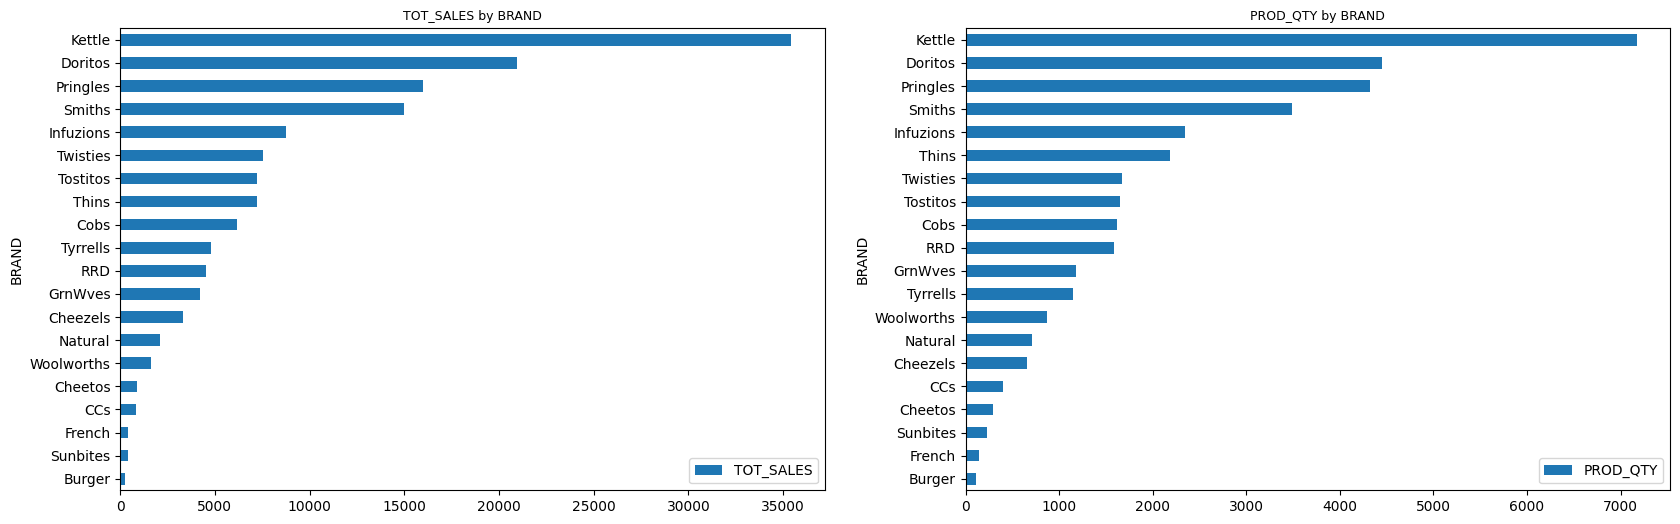

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
filt_df.groupby('BRAND')[['TOT_SALES']].sum().sort_values(by='TOT_SALES',ascending=True).plot(kind='barh',ax=ax[0])
filt_df.groupby('BRAND')[['PROD_QTY']].sum().sort_values(by='PROD_QTY').plot(kind='barh',ax=ax[1])
ax[0].set_title('TOT_SALES by BRAND',fontsize=9)
ax[1].set_title('PROD_QTY by BRAND',fontsize=9)
plt.show()

**Apriori analysis**

In [ ]:
# We'll  run an apriori analysis to investigate if there's any affinity between our customer segments and particular brands.

In [135]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [141]:
data = complete_df.reset_index().rename(columns = {"index":"transaction"})
data["Segment"] = data["LIFESTAGE"] + ' - ' + data['PREMIUM_CUSTOMER']
segment_brand_encode = pd.concat([pd.get_dummies(data["Segment"]), pd.get_dummies(data["BRAND"])], axis=1)
frequent_sets = apriori(segment_brand_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)
set_temp = data['Segment'].unique()
rules[rules['antecedents'].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(OLDER FAMILIES - Budget),(Smiths),0.087193,0.123016,0.011948,0.137027,1.113895,0.001222,1.016236,0.112016
2,(OLDER SINGLES/COUPLES - Budget),(Kettle),0.069596,0.167334,0.012422,0.178488,1.066658,0.000776,1.013578,0.067167
4,(OLDER SINGLES/COUPLES - Premium),(Kettle),0.067115,0.167334,0.011944,0.177959,1.063495,0.000713,1.012925,0.064000
6,(RETIREES - Budget),(Kettle),0.057652,0.167334,0.010505,0.182214,1.088926,0.000858,1.018196,0.086660
8,(RETIREES - Mainstream),(Kettle),0.080935,0.167334,0.013723,0.169554,1.013269,0.000180,1.002674,0.014248
10,(YOUNG SINGLES/COUPLES - Mainstream),(Kettle),0.079209,0.167334,0.015579,0.196684,1.175400,0.002325,1.036537,0.162062


By looking at our a-priori analysis, we can conclude that Kettle is the brand of choice for most segments.

In [66]:
complete_df[complete_df['BRAND'] == 'Kettle']['PACKET_SIZE'].value_counts()

175    19022
150    19009
135     3257
Name: PACKET_SIZE, dtype: int64

The top two packet sizes sold by Kettle (175,150) also make up the highest selling sizes in both quantity and sales.
This correlates to the high affinity of Kettle brand among the segments.

In [67]:
complete_df[complete_df['BRAND'] == 'Smiths']['PACKET_SIZE'].value_counts()

175    7507
170    7370
330    6339
150    5904
380    3233
Name: PACKET_SIZE, dtype: int64

**Packet size analysis for some segments**

In [ ]:
segment_size_encode = pd.concat([pd.get_dummies(data["Segment"]), pd.get_dummies(data["PACKET_SIZE"])], axis=1)
frequent_sets = apriori(segment_size_encode, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_sets, metric="lift", min_threshold=1)
set_temp = data['Segment'].unique()
rules[rules['antecedents'].apply(lambda x: list(x)).apply(lambda x: x in set_temp)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(OLDER FAMILIES - Budget),(150),0.087193,0.162937,0.014542,0.166775,1.023558,0.000335,1.004607,0.025214
2,(OLDER FAMILIES - Budget),(175),0.087193,0.269069,0.023539,0.269964,1.003327,0.000078,1.001226,0.003632
4,(OLDER FAMILIES - Mainstream),(175),0.053664,0.269069,0.014542,0.270977,1.007091,0.000102,1.002617,0.007440
6,(OLDER FAMILIES - Premium),(175),0.042162,0.269069,0.011413,0.270691,1.006030,0.000068,1.002225,0.006258
8,(OLDER SINGLES/COUPLES - Budget),(150),0.069596,0.162937,0.011393,0.163697,1.004665,0.000053,1.000909,0.004990
10,(OLDER SINGLES/COUPLES - Budget),(175),0.069596,0.269069,0.018744,0.269334,1.000985,0.000018,1.000363,0.001058
13,(OLDER SINGLES/COUPLES - Premium),(150),0.067115,0.162937,0.011218,0.167150,1.025857,0.000283,1.005059,0.027019
15,(OLDER SINGLES/COUPLES - Premium),(175),0.067115,0.269069,0.018068,0.269203,1.000499,0.000009,1.000184,0.000535
16,(RETIREES - Budget),(175),0.057652,0.269069,0.015591,0.270439,1.005094,0.000079,1.001879,0.005379
18,(RETIREES - Mainstream),(150),0.080935,0.162937,0.013334,0.164747,1.011111,0.000147,1.002168,0.011957


**Let's also look into brand and packet size affinity between Mainstream Young Singles/Couples vs the rest of the segments.**

**Affinity to brand**

In [13]:
# Separating our target data from the rest

target_df = complete_df.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"')
ind_to_drop = complete_df.query('LIFESTAGE == "YOUNG SINGLES/COUPLES" & PREMIUM_CUSTOMER == "Mainstream"').index
other_df = complete_df.drop(index=ind_to_drop)

In [14]:
print(target_df.shape)
print(other_df.shape)

(19544, 13)
(227196, 13)


In [15]:
quantity_target_df = target_df["PROD_QTY"].sum()
quantity_other = other_df["PROD_QTY"].sum()

In [34]:
print(f'Total quantity bought by the Target segment :{quantity_target_df}')
print(f'Total quantity bought by the Other segments :{quantity_other}')

Total quantity bought by the Target segment :36225
Total quantity bought by the Other segments :434174


In [22]:
quantity_target_by_brand = target_df.groupby('BRAND')['PROD_QTY'].sum()/quantity_target_df
quantity_other_by_brand = other_df.groupby('BRAND')['PROD_QTY'].sum()/quantity_other


In [39]:
brand_proportions = pd.merge(quantity_target_by_brand, quantity_other_by_brand, on="BRAND")
brand_proportions.rename(columns={'PROD_QTY_x':'Target_Segment','PROD_QTY_y':'Other'},inplace=True)
brand_proportions["affinity_to_brand"] = (brand_proportions["Target_Segment"] / brand_proportions["Other"])

In [41]:
brand_proportions.sort_values(by='affinity_to_brand',ascending=False)

,Target_Segment,Other,affinity_to_brand
BRAND,,,
Tyrrells,0.031553,0.025692,1.228095
Twisties,0.046184,0.037877,1.219319
Doritos,0.122761,0.101075,1.214553
Kettle,0.197985,0.165553,1.195897
Tostitos,0.045411,0.037978,1.195713
Pringles,0.119420,0.100635,1.186670
Cobs,0.044638,0.039049,1.143124
Infuzions,0.064679,0.057065,1.133435
Thins,0.060373,0.056986,1.059423


Findings:


*   Mainstream Young Singles/Couples are 22% more likely to purchase Tyrells than the rest of the population.
*   They are also 56% less likely to purchase the brand Burger compared to the rest.
*   We could take this into consideration if we choose to carry out targeted marketing to this segment.






**Affinity to packet size**

In [35]:
quantity_target_by_size = target_df.groupby('PACKET_SIZE')['PROD_QTY'].sum()/quantity_target_df
quantity_other_by_size = other_df.groupby('PACKET_SIZE')['PROD_QTY'].sum()/quantity_other

In [44]:
size_proportions = pd.merge(quantity_target_by_size, quantity_other_by_size, on="PACKET_SIZE")
size_proportions.rename(columns={'PROD_QTY_x':'Target_Segment','PROD_QTY_y':'Other'},inplace=True)
size_proportions["affinity_to_size"] = (size_proportions["Target_Segment"] / size_proportions["Other"])

In [46]:
size_proportions.sort_values(by='affinity_to_size',ascending=False)

,Target_Segment,Other,affinity_to_size
PACKET_SIZE,,,
270,0.031829,0.025096,1.268287
380,0.032160,0.025584,1.257030
330,0.061284,0.050162,1.221717
134,0.119420,0.100635,1.186670
110,0.106280,0.089791,1.183637
210,0.029124,0.025121,1.159318
135,0.014769,0.013075,1.129511
250,0.014355,0.012781,1.123166
170,0.080773,0.080986,0.997370


In [49]:
complete_df[complete_df['PACKET_SIZE'] == 270]['BRAND'].unique()

array(['Twisties'], dtype=object)

Findings:

Despite Mainstream Young Singles/Couples having a 27% chance of purchasing 270g packets, it may not necessarily speak to the packet size but rather to the brand given only Twisites brand offers the packet size.

# **Conclusion and Recommendations**

**Customer Distribution**
- 72,637 unique customers based on LYLTY_CARD_NBR's
- Segment distribution: Top 3:

 -- Young Singles/Couples Mainstream

 -- Retiress / Mainstream

 -- Older Singles/Couples Mainstream

- New Families constitute the least (about 4% of the total)

**Sales Patterns**

- Most sold quantity per transaction : 2 packets
- Sales peak in December particularly around the christmas period
- Mean Sales amount per transaction : $ 7.4
- Top 3 Brands sold (Quantity):

 --Kettle

 --Smiths

 --Doritos

- Top 3 Brands sold (Tot_sales):

 --Kettle

 --Doritos

 --Smiths

- Most common packet sizes by both quantity sold and price:

  --175g
  
  --150g
  
  --134g

**Customer segment findings**

- Top sales contributors are:

 -- Older Families / Budget,

 -- Young Singles/Couples Mainstream

 -- Retirees / Mainstream,

 -- Young Families / Budget

 ,with the least being New Families.
- Segments with the highest average spend are Young and Midage Singles/Couples / Mainstream.
- Segments with most purchases include Older Families / Budget, Retirees / Mainstream, Young Singles/Couples / Mainstream.
- Drivers of sales in those segments are due to number of unique customers in all the segments but Older Families / Budget where the sales mainly come from repeat purchases showing loyalty in that category.


**Recommendations**

1. Older Families / Budget;

- One sector to consider due to the following, highest contributors to sales despite not having the largest customer base.
- Have proven loyalty due through having the largest number of repeat purchases.
- They've also shown an affinity to the Smiths brand unlike most of the other categories and the packet size 150g.
- Also appear to be cost sensitive ranking quite low in spend per chip packet.

Strategies to explore:

- Look to offer discounts or coupons on Smiths products.
- Run loyalty programs that reward repeat purchases.
- Could be worth looking into the preference to that brand ie Is it more healthy and look to adding similar product to capitalise on this segment even more.
- Be mindful of introducing new products to this segment given their keenness on price.

2. Young Singles/Couples /Mainstream;
- Top contributor to sales and boast the highest customer base.
- Brand affinity doesn't differ from the rest of the segments with their preference being Kettles .
- Willing to spend more on a packet of chips.
- They're also decent repeat customers and high quantity purchasers.

Strategies to explore:

- This could be a decent segment to experiment new products on with different packaging etc
- Experiment with quantity based promos focused on selling more products given their tendency to purchase more per transaction

3. Retirees / Mainstream:
Decent contributor to sales, quantity sold and no. of repeat customers ranking in top 3 in all those categories

4. Older Singles/Couples as a whole
- Most balanced and consistent segment in terms of purchasing behaviour as well as among it's premium_customer segments(budget, mainstream and premium).
- Worth running specific product marketing on them as well.

5. Kettle Brand appears to be the most universally adopted brand regardless of the segment with the packet size of 175g appearing to be the most favoured as well.



---



---

